<a href="https://colab.research.google.com/github/brindanaveen0109/FlickPicks/blob/main/flickpicks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORTING THE DATA FILES REQUIRED**


In [1]:
import pandas as pd

In [2]:
movies = pd.read_csv("/content/datasets/movies.csv")
ratings = pd.read_csv("/content/datasets/ratings.csv")

In [3]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
62418,209157,We (2018),Drama
62419,209159,Window of the Soul (2001),Documentary
62420,209163,Bad Poems (2018),Comedy|Drama
62421,209169,A Girl Thing (2001),(no genres listed)


In [4]:
ratings

,userId,movieId,rating,timestamp
0,1,296.0,5.0,1.147880e+09
1,1,306.0,3.5,1.147869e+09
2,1,307.0,5.0,1.147869e+09
3,1,665.0,5.0,1.147879e+09
4,1,899.0,3.5,1.147869e+09
...,...,...,...,...
85373,647,9010.0,2.5,1.330432e+09
85374,647,27402.0,4.0,1.506807e+09
85375,647,27660.0,3.0,1.456428e+09
85376,647,27904.0,3.5,1.509057e+09


In [5]:
mergedDataset = pd.merge(movies, ratings, on = "movieId")

In [6]:
mergedDataset

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2,3.5,1.141416e+09
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0,1.439472e+09
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4,3.0,1.573944e+09
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,8.586259e+08
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,4.0,8.904925e+08
...,...,...,...,...,...,...
85372,204698,Joker (2019),Crime|Drama|Thriller,181,2.5,1.572639e+09
85373,204698,Joker (2019),Crime|Drama|Thriller,376,5.0,1.571700e+09
85374,204698,Joker (2019),Crime|Drama|Thriller,606,5.0,1.570300e+09
85375,205054,Hustlers (2019),Comedy|Crime|Drama,606,0.5,1.570392e+09


# **DATA PREPROCESSING**

In [7]:
mergedDataset.describe()

,movieId,userId,rating,timestamp
count,85377.000000,85377.000000,85377.000000,8.537700e+04
mean,20758.895956,333.829732,3.583131,1.201291e+09
std,38026.041808,192.379839,1.034942,2.328013e+08
min,1.000000,1.000000,0.500000,8.281634e+08
25%,1089.000000,171.000000,3.000000,9.865961e+08
50%,2759.000000,343.000000,4.000000,1.166776e+09
75%,8368.000000,515.000000,4.000000,1.437761e+09
max,205106.000000,647.000000,5.000000,1.574254e+09


In [8]:
mergedDataset.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2,3.5,1.141416e+09
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0,1.439472e+09
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4,3.0,1.573944e+09
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,8.586259e+08
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,4.0,8.904925e+08


In [9]:
mergedDataset.tail()

,movieId,title,genres,userId,rating,timestamp
85372,204698,Joker (2019),Crime|Drama|Thriller,181,2.5,1.572639e+09
85373,204698,Joker (2019),Crime|Drama|Thriller,376,5.0,1.571700e+09
85374,204698,Joker (2019),Crime|Drama|Thriller,606,5.0,1.570300e+09
85375,205054,Hustlers (2019),Comedy|Crime|Drama,606,0.5,1.570392e+09
85376,205106,Can You Keep a Secret? (2019),Comedy|Romance,153,5.0,1.568667e+09


In [10]:
mergedDataset.isna().sum()

movieId      0
title        0
genres       0
userId       0
rating       0
timestamp    0
dtype: int64

In [11]:
mergedDataset.isnull().sum()

movieId      0
title        0
genres       0
userId       0
rating       0
timestamp    0
dtype: int64

In [12]:
mergedDataset.drop('timestamp', axis = 1, inplace = True)

In [13]:
mergedDataset

,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2,3.5
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4,3.0
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,4.0
...,...,...,...,...,...
85372,204698,Joker (2019),Crime|Drama|Thriller,181,2.5
85373,204698,Joker (2019),Crime|Drama|Thriller,376,5.0
85374,204698,Joker (2019),Crime|Drama|Thriller,606,5.0
85375,205054,Hustlers (2019),Comedy|Crime|Drama,606,0.5


In [14]:
mergedDataset[mergedDataset['rating'] < 0]

,movieId,title,genres,userId,rating


**SPLITTING THE GENRES THAT HAS COME MULTIPLE TIMES**

In [15]:
def split_genre(genre_string):
  return genre_string.split("|")

In [16]:
allgenres = []
for genre in mergedDataset["genres"]:
  individual_genres = split_genre(genre)
  allgenres.extend(set(individual_genres))
unique_genres = set(allgenres)
unique_genres

{'(no genres listed)',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

# **VISUALISATION/EDA**

In [17]:
import matplotlib.pyplot as plt

**USING HISTOGRAM TO PLOT MOVIE RATINGS AND NUMBER OF MOVIES BASED ON DISTIBUTION OF RATINGS**

Text(0.5, 1.0, 'Distribution of movie ratings')

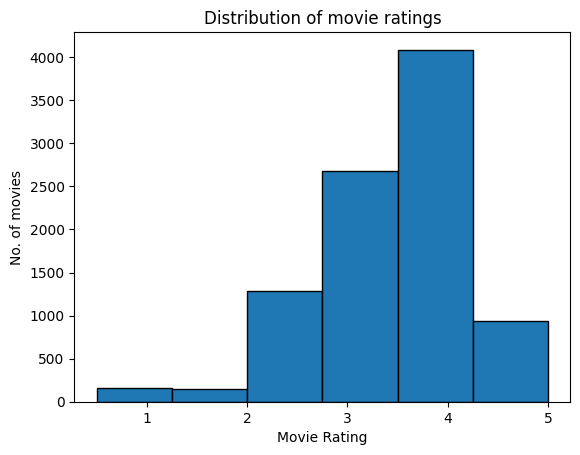

In [18]:
movie_ratings = mergedDataset.groupby("movieId")["rating"].mean()
plt.hist(movie_ratings, bins = 6, edgecolor = "black")
plt.xlabel("Movie Rating")
plt.ylabel("No. of movies")
plt.title("Distribution of movie ratings")

**USING SCATTERPLOT FOR USER ANALYSIS**

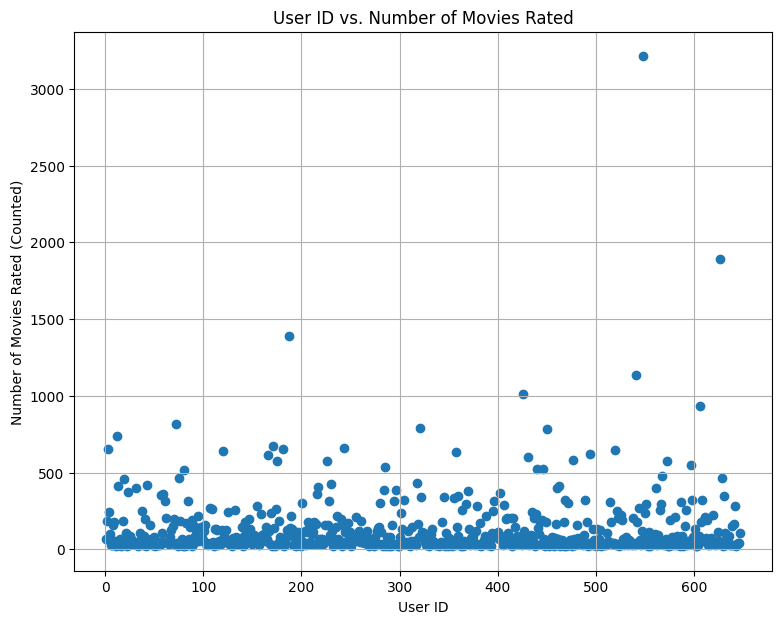

In [19]:
user_movie_count = mergedDataset.groupby('userId')['movieId'].count()
plt.figure(figsize=(9, 7))
plt.scatter(user_movie_count.index, user_movie_count.values)
plt.xlabel('User ID')
plt.ylabel('Number of Movies Rated (Counted)')
plt.title('User ID vs. Number of Movies Rated')
plt.grid(True)
plt.show()

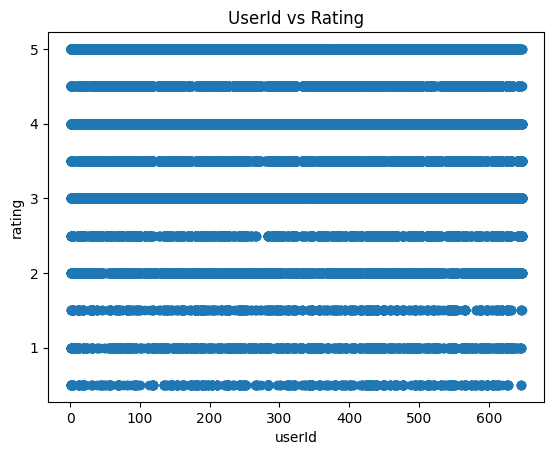

In [20]:
plt.scatter(mergedDataset['userId'], mergedDataset['rating'])
plt.xlabel('userId')
plt.ylabel('rating')
plt.title('UserId vs Rating')
plt.show()

In [21]:
mergedDataset['movieId'].value_counts()

356       322
296       305
318       298
593       279
2571      271
         ... 
38097       1
38538       1
38701       1
38849       1
205106      1
Name: movieId, Length: 9303, dtype: int64

In [24]:
print(mergedDataset['rating'].unique().tolist())
print(mergedDataset['userId'].nunique())
print(mergedDataset['movieId'].nunique())
print(mergedDataset['rating'].value_counts())

[3.5, 4.0, 3.0, 5.0, 2.0, 4.5, 2.5, 1.0, 1.5, 0.5]
647
9303
4.0    23168
3.0    16987
5.0    13226
3.5    10369
4.5     7610
2.0     5514
2.5     3982
1.0     2312
1.5     1218
0.5      991
Name: rating, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

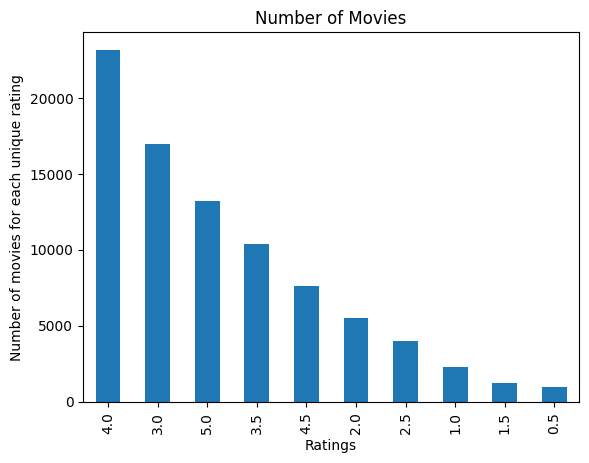

In [27]:
mergedDataset['rating'].value_counts().plot(kind='bar', title='Number of Movies')
plt.xlabel("Ratings")
plt.ylabel("Number of movies for each unique rating")
plt.show